import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [7]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/63

make measure image

In [8]:
def_img = io.imread("image\\10.22.2020 Heptane-40%water60%ethanol\\frame 2\\3-40-23 PM\\10.22.2020 (2) 0324.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

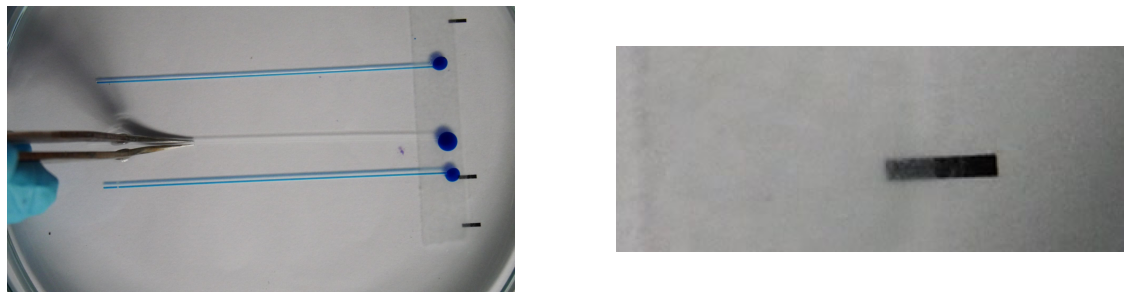

In [9]:
measure_im = crop(def_img, ((750, 200), (1550, 50), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

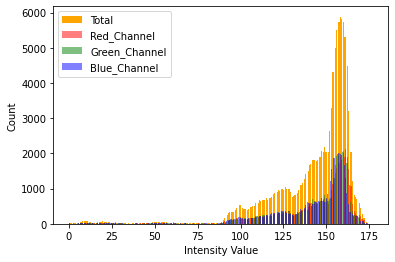

In [10]:
plot_histogram(measure_im)

[77, 176]
[76, 239]


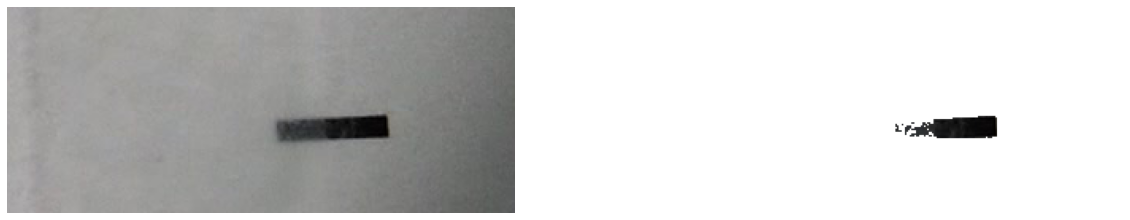

length of picture is  63.00793600809346 pixel


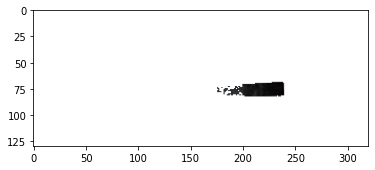

In [11]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

63 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 63


find definition length on first picture

(1080, 1920, 3) (160, 1000, 3)


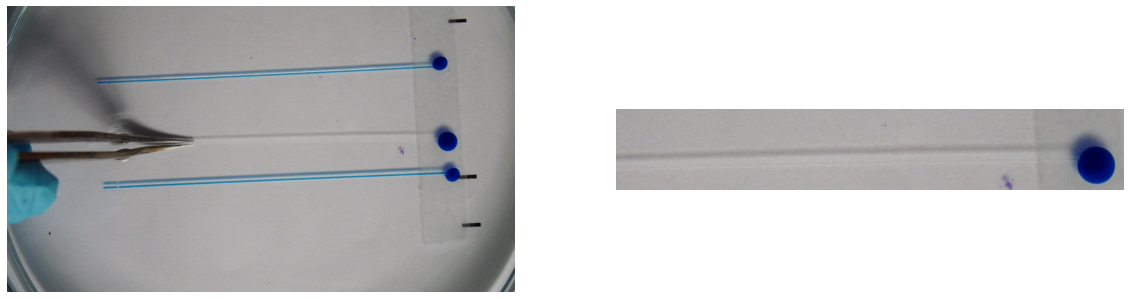

In [12]:
def_crop_im = crop(def_img, ((400, 520), (720, 200), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

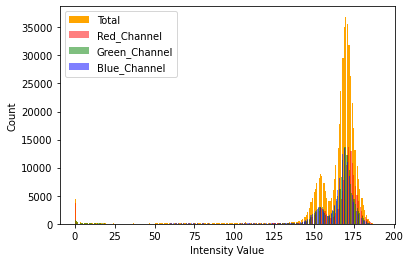

In [13]:
plot_histogram(def_crop_im)

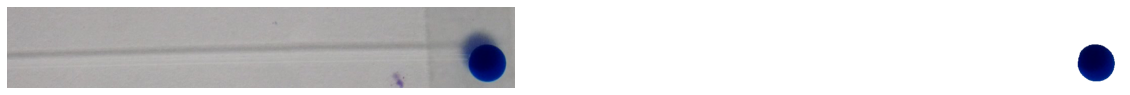

In [14]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[114, 909]
[112, 981]
ldef  72.02777242147643 pixel


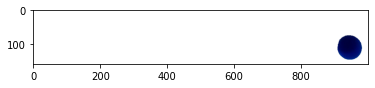

In [15]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0324 to 0470

In [16]:
number_of_picture = 324
thresh = 45
template1 = []
l_def = 72.02777242147643
#470-324 = 146
for i in range(147):  
    image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 2\\3-40-23 PM\\10.22.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
    crop_image = crop(image, ((400, 520), (720, 200), (0,0)), copy=False)
    thresh_image = thresholding(thresh,crop_image)
    # plot_compare_img(crop_image,thresh_image)
    length = find_length(thresh_image,False)
    length = length - l_def
    length = int(length)
    template1.append(length)
    # print(i, length)
    # plt.figure()
    # plt.imshow(thresh_image)
    # for i in range(len(template1)/2):
    #     if(template1[i] > 70):


In [17]:
print(template1)
print(len(template1))

[5, 2, 3, 4, 5, 8, 10, 12, 14, 16, 18, 21, 22, 24, 28, 29, 32, 33, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 67, 69, 70, 73, 76, 76, 78, 80, 82, 83, 86, 87, 89, 91, 93, 95, 98, 100, 101, 104, 105, 108, 109, 112, 114, 115, 117, 119, 121, 124, 124, 126, 128, 130, 132, 134, 136, 138, 140, 140, 143, 145, 147, 149, 151, 152, 156, 156, 158, 159, 162, 164, 165, 166, 168, 170, 171, 173, 174, 177, 178, 181, 183, 185, 187, 187, 188, 190, 192, 195, 195, 197, 198, 200, 203, 203, 205, 207, 209, 210, 212, 213, 214, 218, 219, 219, 221, 223, 226, 226, 228, 229, 231, 234, 235, 235, 237, 238, 241, 242, 244, 245, 247, 248, 251, 251, 254, 256, 258, 259, 260, 262, 263, 265]
147


find length on crop value 2 from 0471 to 3650 

3651-6864 รูปเกิน

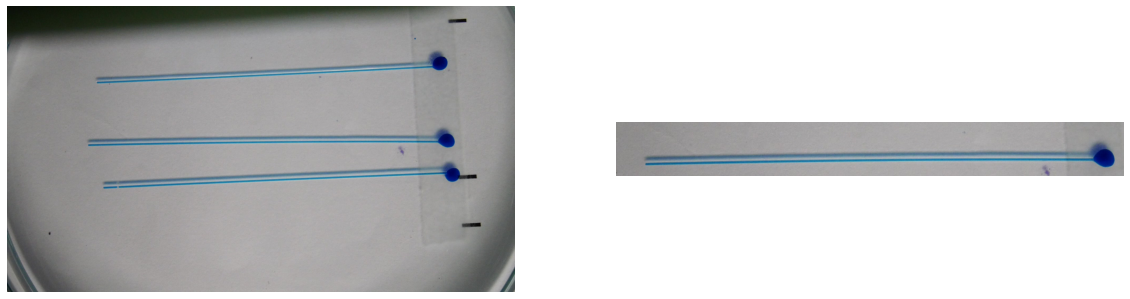

In [18]:
image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 2\\3-40-23 PM\\10.22.2020 (2) " + str(3650).zfill(4) + ".jpg" )
crop_image = crop(image, ((400, 520), (220, 200), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [19]:
number_of_picture = 471
thresh = 45
template2 = []
l_def = 72.02777242147643
#3650-471 = 3179
for i in range(3180):
    image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 2\\3-40-23 PM\\10.22.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
    crop_image = crop(image, ((400, 520), (220, 200), (0,0)), copy=False)
    # if(True):
    thresh_image = thresholding(thresh,crop_image)
    # else:
    #     thresh_image = thresholding(40,crop_image)
    # plot_compare_img(crop_image,thresh_image)
    # print(i)
    length = find_length(thresh_image,False)
    length = length - l_def
    length = int(length)
    template2.append(length)
    # print(i, length)
    # plt.figure()
    # plt.imshow(thresh_image)

In [20]:
print(template2)
print(len(template2))

[267, 267, 269, 270, 273, 274, 275, 277, 278, 280, 283, 283, 285, 286, 287, 289, 289, 291, 293, 294, 297, 298, 299, 301, 303, 306, 305, 307, 308, 309, 312, 314, 314, 315, 317, 319, 321, 323, 322, 324, 326, 328, 330, 330, 332, 333, 335, 336, 337, 339, 340, 341, 343, 346, 346, 348, 349, 349, 352, 354, 356, 355, 357, 358, 359, 362, 364, 364, 363, 367, 370, 371, 372, 373, 374, 375, 378, 378, 379, 381, 382, 384, 385, 387, 389, 390, 392, 394, 394, 396, 397, 398, 398, 401, 402, 403, 404, 405, 408, 409, 410, 411, 413, 414, 415, 417, 418, 420, 421, 422, 422, 425, 425, 426, 429, 429, 430, 431, 432, 435, 435, 436, 439, 441, 441, 441, 445, 445, 446, 447, 449, 450, 451, 452, 454, 454, 455, 456, 457, 459, 460, 462, 462, 464, 465, 467, 468, 469, 471, 471, 473, 475, 476, 476, 478, 479, 480, 481, 482, 484, 485, 485, 489, 489, 490, 492, 492, 494, 495, 496, 497, 498, 499, 500, 502, 503, 505, 505, 507, 508, 509, 510, 512, 511, 514, 514, 515, 517, 517, 518, 520, 521, 523, 523, 525, 526, 527, 528, 529, 530,

concat 2 template and calculate pixel to centimeter

In [21]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [22]:
print(l_array)

[ 0.03968254  0.01587302  0.02380952 ... 10.404762   10.404762
 10.404762  ]


export data to exel

In [23]:
import pandas as pd

In [24]:
print(len(l_array))

3327


In [25]:
data = []
num_img = 324
for i in range(len(l_array)):
    data.append(( " 10.22.2020 (2) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptanewater-40-60(2)_10.22.2020_3-40-23-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


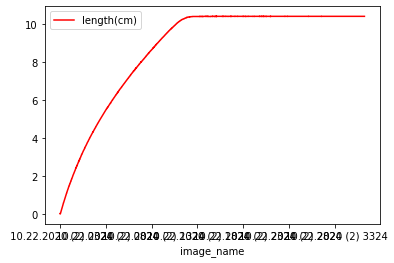

In [26]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()